In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from bokeh.charts import Scatter, show, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure
output_notebook()

%matplotlib inline


Loading BokehJS ...

In [2]:
pctat_dict = {
    'Alanine': (2/12),
    'Arginine': (5/18),
    'Asparagine': (5/6),
    'Aspartic acid': (3/6),
    'Cysteine': (3/6),
    'Glutamic acid': (3/6),
    'Glutamine': (3/6),
    'Glycine': (2/12),
    'Histidine': (3/6),
    'Isoleucine': (8/9),
    'Leucine': (6/12),
    'Lycine': (5/6),
    'Methionine': (2/3),
    'Phenylalanine': (5/6),
    'Proline': (2/12),
    'Serine': (9/18),
    'Threonine': (6/12),
    'Tryptophane': (1/3),
    'Tyrosine': (5/6),
    'Valine': (6/12)}

aa = ['Alanine', 'Arginine', 'Asparagine', 'Aspartic acid', 'Cysteine', 'Glutamic acid', 'Glutamine',  'Glycine',
      'Histidine', 'Isoleucine', 'Leucine', 'Lycine', 'Methionine', 'Phenylalanine', 'Proline', 'Serine','Threonine',  
      'Tryptophane', 'Tyrosine', 'Valine']
mw = [89.094, 174.203, 132.119, 133.104, 121.154, 147.131, 146.146, 75.067, 155.156, 131.175, 131.175, 146.189, 149.208,
      165.192, 115.132, 105.093, 119.119, 204.228, 181.191, 117.148]
pct_at = [pctat_dict['Alanine'], pctat_dict['Arginine'], pctat_dict['Asparagine'], pctat_dict['Aspartic acid'], pctat_dict['Cysteine'],
       pctat_dict['Glutamic acid'], pctat_dict['Glutamine'], pctat_dict['Glycine'], pctat_dict['Histidine'], pctat_dict['Isoleucine'],
       pctat_dict['Leucine'], pctat_dict['Lycine'], pctat_dict['Methionine'], pctat_dict['Phenylalanine'], pctat_dict['Proline'],
       pctat_dict['Serine'], pctat_dict['Threonine'], pctat_dict['Tryptophane'], pctat_dict['Tyrosine'], pctat_dict['Valine']]
biochem = ['nonpolar', 'basic', 'polar', 'acidic', 'nonpolar', 'acidic', 'polar',  'nonpolar',
      'basic', 'nonpolar', 'nonpolar', 'basic', 'nonpolar', 'nonpolar', 'nonpolar', 'polar','polar',  
      'nonpolar', 'polar', 'nonpolar']
biochem_col = ['blue', 'green', 'orange', 'red', 'blue', 'red', 'orange',  'blue',
      'green', 'blue', 'blue', 'green', 'blue', 'blue', 'blue', 'orange','orange',  
      'blue', 'orange', 'blue']

# print(len(aa))
# print(len(mw))
# print(len(fcp))
# print(len(scp))
# print(len(biochem))

# Plot with matplotlib

<function matplotlib.pyplot.show>

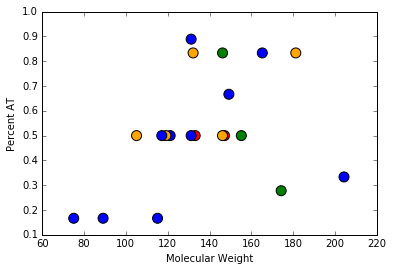

In [3]:
plt.scatter(x = mw, y = pct_at, c = biochem_col, s = 100)
plt.xlabel('Molecular Weight')
plt.ylabel('Percent AT')

plt.show

# Plot with Bokeh
### First convert lists into a dataframe

In [4]:
aa_dict = {
    'Amino_acid': aa,
    'Molecular_weight': mw,
    'Biochem_property': biochem,
    'Percent_AT': pct_at}

AA = pd.DataFrame(aa_dict)

# print(AA)

In [5]:
p = Scatter(AA, x='Molecular_weight', y='Percent_AT', color="Biochem_property", legend="top_left",
            xlabel="Molecular Weight", ylabel="Percent AT")
show(p)

# Try with hover tool using low-level functions

In [6]:
source = ColumnDataSource(data=AA)

hover = HoverTool(
        tooltips=[
            ("(x,y)", "(@Molecular_weight, @Percent_AT)"),
            ("amino_acid", "@Amino_acid"),
            ("biochem", "@Biochem_property"),
        ]
    )

p = figure(x_axis_label="Molecular Weight", y_axis_label="Percent AT", title=None, tools=[hover])

p.circle(AA['Molecular_weight'], AA['Percent_AT'], size=10, color = biochem_col, source=AA)
p.legend.location = 'top_left'

show(p)

//anaconda/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
//anaconda/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
//anaconda/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
//anaconda/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

Se

# Try again with new code

In [7]:
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool


def scatter_with_hover(df, x, y,
                       fig=None, hov_cols=None, name=None,
                       fig_width=500, fig_height=500, **kwargs):
    """
    Plots an interactive scatter plot with circle method of `x` vs `y` using bokeh, with automatic
    tooltips showing columns from `df`.
    Arguments
    ----------
    df : pandas.DataFrame
        DataFrame containing the data to be plotted
    x : str
        Name of the column to use for the x-axis values
    y : str
        Name of the column to use for the y-axis values
    fig : bokeh.plotting.Figure, optional
        Figure on which to plot (if not given then a new figure will be created)
    hov_cols : list of str
        Columns to show in the hover tooltip (default is to show all)
    name : str
        Bokeh series name to give to the scattered data
    **kwargs
        Any further arguments to be passed to fig.scatter
    Returns
    -------
    bokeh.plotting.Figure
        Figure (the same as given, or the newly created figure)
    Example
    -------
    fig = scatter_with_hover(df, 'A', 'B')
    show(fig)
    fig = scatter_with_hover(df, 'A', 'B', hov_cols=['C', 'D', 'E'], marker='x', color='red')
    show(fig)
    """

    # If we haven't been given a Figure obj then create it with default
    # size etc.
    if fig is None:
        fig = figure(width=fig_width, height=fig_height, tools=['box_zoom', 'reset', 'save'])

    # We're getting data from the given dataframe
    source = ColumnDataSource(data=df)

    # We need a name so that we can restrict hover tools to just this
    # particular 'series' on the plot. You can specify it (in case it
    # needs to be something specific for other reasons), otherwise
    # we just use 'main'
    if name is None:
        name = 'main'

    # Actually do the scatter plot - the easy bit
    # (other keyword arguments will be passed to this function)
    fig.circle(df[x], df[y], source=source, name=name, **kwargs)

    # Now we create the hover tool, and make sure it is only active with
    # the series we plotted in the previous line
    hover = HoverTool(names=[name])

    if hov_cols is None:
        # Display *all* columns in the tooltips
        hover.tooltips = [(c, '@' + c) for c in df.columns]
    else:
        # Display just the given columns in the tooltips
        hover.tooltips = [(c, '@' + c) for c in hov_cols]

#     hover.tooltips.append(('index', '$index'))

    # Finally add/enable the tool
    fig.add_tools(hover)

    return fig

In [8]:
fig = figure(x_axis_label="Molecular Weight (g/mol)", y_axis_label="Percent AT", title='Amino Acid MW vs Percent AT')

p = scatter_with_hover(df = AA, x = 'Molecular_weight', y = 'Percent_AT', fig = fig, 
                         hov_cols = ['Molecular_weight','Percent_AT', 'Biochem_property'], color = biochem_col, size = 10)
output_notebook()
show(p)

//anaconda/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
//anaconda/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
//anaconda/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
//anaconda/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

Se

Loading BokehJS ...